<a href="https://colab.research.google.com/github/abhilash1910/AI-Geometric-Learning/blob/master/ReimanMetric_%26_Manifold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Riemann Metric and Manifold

Here we will be going through the implementation of a Riemann metric tensor and some transformations in its manifold. In Rimennian domain, every locally connected points resemble a Euclidean manifold. This allows us to formulate transformations in Riemannian domain with Tangent vectors at certain base points on the manifold. A tangent vector denoted by an equation: 
$${\gamma(t) = (\mu(t),v(t)) }$$ and if we move it along a surface of the manifold, we get 
   $${V=  [\delta(\phi)/\delta(\mu)]\mu'(t) +\delta(\phi)/\delta(v)]v'(t) }$$
A Riemann metric g on  M is a smooth symmetric positive definite covariant 2 tensor.For each $p\in M $,$g_{p}$ denotes the inner product on $T_{p}M$ as $$<v,w>_{g}=g_{p}(v,w)$$ for all $v,w \in T_{p}M$ we imply $(M,g)$ as a Riemann manifold.

In this case, we will be looking at some important transformations for a subset of Rieman manifold called the Spherical or Hypershere manifold:

- Geodesic Distance: Since geodesics are shortest paths between 2 points in a Riemann space, it can be interpreted as an extension of Euclidean shortest straight line distance for higher order manifolds. For computing the geodesic, between 2 or more points, it is important to determine the connections between the points in a Riemannian manifold. A Connection allows us to compare different tangent vectors from different tangent spaces of nearby points. These affine connections are required to satisfy certain properties:
 $C^\alpha(M)$ linearity in x , $R$ linearity in y and Leibniz rule where $f(y)=x$  Based on these connections, we require to solve a double order equation with the help of Christoffel symbols. In this case, we are going to manipulate a hypersphere Riemannian manifold for simplicity, and determine the distance between 2 tangents p and q at 2 distinct different base points. The geodesic formula is given as :
 $$gd(\mu,v)= cos^{-1}(\mu,v)$$

- Logarithm Map: Log map in the case of Riemannian manifold involves finding the corresponding vector representation of a point A in the manifold. This is the inverse of exponential mapp. In the case of Euclidean geometry, subtraction of 2 vectors at a base point produces the logarithmic map since the vectors are linear. However as the dimensions increase, direct subtraction of linear vectors is not an option. Hence , a mapping has to be made from the base point on the manifold to the 2 tangent vectors for determining the logarithmic map.
This inturn requires computation of the geodesic distance between the tangents at a base point. 
$$ log (p,q)=gd(p,q)[q-<p,q>p]/[||q-<p,q>p||]$$

- Exponential Map: This is the inverse of logarithmic map and determines the mapping of a vector to a point in the manifold.

In [3]:
!pip install geomstats

  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import geomstats.visualization as viz
import geomstats.backend as gs
import geomstats.geometry as geometry
from geomstats.geometry.connection import Connection
import autograd

class RiemanMetric():
  '''Class which implements transformations on the Riemannian manifold assuming tangents at respectove
  base points'''

  def geodesic_distance(self,a,b):
    '''Computes the Geodesic distance between tangents at 2 vector base points on the manifold'''
    cosine = torch.sum(a*b)/(torch.norm(a)*torch.norm(b))
    if cosine>1: 
      cosine = 1
    elif cosine<-1: 
      cosine = -1
    return torch.arccos(cosine)

  def squared_distance(self,a,b):
    '''Square of the geodesic distance'''
    return self.geodesic_distance(a,b)**2

  def logarithm_map(self,a,b):
    '''Logarithmic map to map a point on the manifold to its vector representation log(p,A):Yp=V'''
    dist = self.geodesic_distance(a,b)
    val = b - torch.sum(a*b) * a
    if torch.norm(val) != 0:
        return dist * (val/torch.norm(val))
    else:
        return torch.tensor([0.0,0.0,0.0])
    
  def exponential_map(self,a,b):
    '''Exponential map to map a vector to a point on the manifold such that the norm of a vector is the geodesic distance exp(p,v):v->Yp'''
    mag_e = torch.norm(b)
    if mag_e == 0:
        return a
    b_norm = b/mag_e
    return a * np.cos(mag_e) + b_norm * torch.sin(mag_e)
    return mapped_value

  def inner_product_derivative(self,v,p,q):
    '''Derivative of Inner product between 2 tangents at a base point.'''
    v=v.numpy()
    q=q.numpy()
    p=p.numpy()
    aux = np.inner(v,q)
    #return np.einsum('...k,...k->', aux,q)
    return np.inner(aux,q)

  def parallel_transport(self,v,p,q):
    '''Parallel Transport  determines the directionality of the tangent at different base points'''
    logmap_1 = self.logarithm_map(p,q)
    logmap_2 = self.logarithm_map(q,p)
    if torch.norm(logmap_1)!=0 and torch.norm(logmap_2)!=0:
        return v - (torch.dot(logmap_1 , v)/geodesic_distance(p,q)) * (logmap_1+logmap_2)
    else:
        return v
  def loss(self,y_pred):
    '''squared  loss'''
    #return self.geodesic_distance(y_pred,y_true)
    return y_pred**2

  def grad(self,y_pred,y_true):
    '''Gradient of a point on the manifold'''
    loss_grad=torch.autograd.functional.jacobian(self.loss,y_pred)
    return loss_grad
  
if __name__=='__main__':
    #Create an object of RiemanMetric class
    r=RiemanMetric()

    #Create 2 tensors /tangents at 2 base points for geodesic distance
    pa=torch.tensor([-0.65726771, -0.02678122,  0.7531812])
    pb=torch.tensor([1, 0, 0.8])
    #Geodesic Distance
    g_d=r.geodesic_distance(pa,pb)
    print("Geodesic Distance:", g_d)
    #Squared Geodesic Distance
    s_g_d=r.squared_distance(pa,pb)
    print("Squared Geodesic Distance:", s_g_d)
    #logarithm map 
    l_m=r.logarithm_map(pa,pb)
    print("Logarithm Map:", l_m)
    #Exponential map
    e_m=r.exponential_map(pa,pb)
    print("Exponential Map:", e_m)
    #Another tensor for calculating derivative of inner product at base point c
    pc=torch.tensor([-0.62339641, -0.02680568,  0.78144633])  
    i_p_d=r.inner_product_derivative(pa,pb,pc)
    print("Inner Product Derivative:",i_p_d)
    #Jacobian of a point on the manifold
    pa=torch.autograd.Variable(torch.tensor([-0.65726771, -0.02678122,  0.7531812],requires_grad=True))
    pb=torch.autograd.Variable(torch.tensor([1, 0, 0.8],requires_grad=True))
    grads=r.grad(pa,pb)
    print("Gradients on manifold:",grads)



Geodesic Distance: tensor(1.6135)
Squared Geodesic Distance: tensor(2.6035)
Logarithm Map: tensor([ 1.2158, -0.0018,  1.0609])
Exponential Map: tensor([ 0.5602, -0.0077,  0.8141])
Inner Product Derivative: [-0.62278974 -0.0267796   0.7806859 ]
Gradients on manifold: tensor([[-1.3145, -0.0000,  0.0000],
        [-0.0000, -0.0536,  0.0000],
        [-0.0000, -0.0000,  1.5064]])


[-0.65726771 -0.02678122  0.7531812 ] <class 'numpy.ndarray'>
[[-0.65726771 -0.02678122  0.7531812 ]
 [-0.62339641 -0.02680568  0.78144633]
 [-0.58831187 -0.02677797  0.80819062]
 [-0.55208236 -0.02669815  0.83336203]
 [-0.51477841 -0.02656636  0.85691156]
 [-0.47647259 -0.02638288  0.87879338]
 [-0.43723948 -0.02614804  0.89896492]
 [-0.39715543 -0.02586232  0.91738689]
 [-0.35629842 -0.02552627  0.93402347]
 [-0.31474802 -0.02514053  0.94884226]
 [-0.27258502 -0.02470587  0.96181445]
 [-0.22989155 -0.02422313  0.97291475]
 [-0.18675064 -0.02369324  0.9821216 ]
 [-0.14324631 -0.02311724  0.98941704]
 [-0.0994632  -0.02249626  0.99478691]
 [-0.05548652 -0.02183149  0.99822073]
 [-0.01140181 -0.02112423  0.99971184]
 [ 0.03270508 -0.02037586  0.99925733]
 [ 0.07674826 -0.01958783  0.99685808]
 [ 0.12064214 -0.01876169  0.99251875]
 [ 0.16430123 -0.01789903  0.9862478 ]
 [ 0.20764048 -0.01700153  0.97805745]
 [ 0.25057571 -0.01607095  0.9679636 ]
 [ 0.29302326 -0.01510909  0.95598592]
 [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


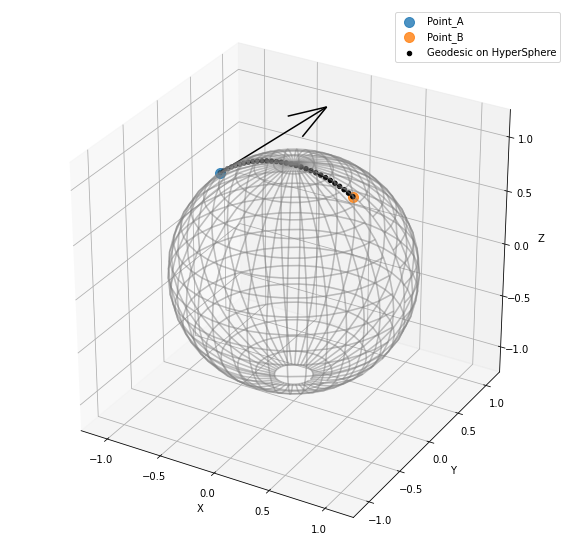

In [29]:
from geomstats.geometry.hypersphere import Hypersphere
import geomstats.datasets.utils as data_utils
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import geomstats.visualization as visualization

data, names = data_utils.load_cities()
sphere = Hypersphere(dim=2)

paris = data[19]
print(paris,type(paris))
vector = gs.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=paris)

result = sphere.metric.exp(tangent_vector, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        initial_tangent_vec=tangent_vector)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))
print(points_on_geodesic)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Point_A')
ax = visualization.plot(result, ax=ax, space='S2', s=100, alpha=0.8, label='Point_B')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic on HyperSphere')

arrow = visualization.Arrow3D(paris, vector=tangent_vector)
arrow.draw(ax, color='black')
ax.legend();

